In [36]:
# IMPORTS AND LOADING DATA
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt

np.random.seed(10)

# load in data
reviews=[]
sentiment_ratings=[]
product_types=[]
helpfulness_ratings=[]

with open("Compiled_Reviews.txt") as f:
   for line in f.readlines()[1:]:
        fields = line.rstrip().split('\t')
        reviews.append(fields[0])
        sentiment_ratings.append(fields[1])
        product_types.append(fields[2])
        helpfulness_ratings.append(fields[3])


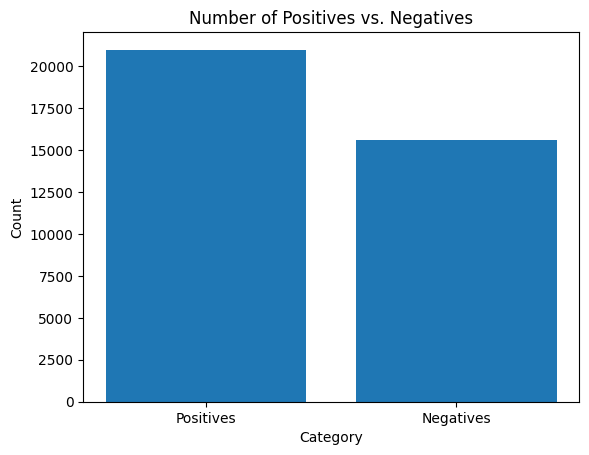

57.38207289044544% positive
42.61792710955456% negative


In [37]:
# HISTOGRAM OF POSITIVES V NEGATIVES
coded_sentiment_ratings = [1 if x == 'positive' else 0 for x in sentiment_ratings]
num_positive = sum(coded_sentiment_ratings)
num_negative = len(coded_sentiment_ratings) - num_positive
categories = ['Positives', 'Negatives']
counts = [num_positive, num_negative]

# Plot the histogram
plt.bar(categories, counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Positives vs. Negatives')
plt.show()

print(f'{(num_positive/len(coded_sentiment_ratings))*100}% positive')
print(f'{(num_negative/len(coded_sentiment_ratings))*100}% negative')


In [38]:
# HELPER FUNCTION FOR REMOVING STEMS
def stem_word(word):
    suffixes = ['ing', 'ed', 'ly', 'es', 's', 'ment', 'tion', 'er', 'est']
    suffixes = sorted(suffixes, key=len, reverse=True)
    
    for suffix in suffixes:
        if word.endswith(suffix):
            return word[:-len(suffix)]  
    return word  

# LOAD IN STOPWORDS
f = open("data/stopwords.txt", "r")
stopwords = []
for line in f:
    stopwords.append(line.strip())
f.close()

punct = ['#', '"', '""', '%', '$', '&', ')', '(', '+', '*', '-'] 


In [39]:
# LOAD IN STOPWORDS
f = open("data/stopwords.txt", "r")
stopwords = []
for line in f:
    stopwords.append(line.strip())
f.close()

punct = ['#', '"', '""', '%', '$', '&', ')', '(', '+', '*', '-'] 

In [40]:
# VOCABULARY - BASE MODEL

# tokenise reviews
token_def = re.compile("[^ \.?!:,)(\"]+")
tokenized_sents = [token_def.findall(txt) for txt in reviews]
tokens=[]
for s in tokenized_sents:

    # FOR BASE MODEL
    tokens.extend(s)

# use a counter to count the tokens
counts=Counter(tokens)
# sort the tokens
so=sorted(counts.items(), key=lambda item: item[1], reverse=True)
so=list(zip(*so))[0]

# get 5000 most common into vocabulary
type_list=so[0:5000]
vocab_list = type_list


In [ ]:
# VOCABULARY - REMOVED STOPWORDS

# tokenise reviews
token_def = re.compile("[^ \.?!:,)(\"]+")
tokenized_sents = [token_def.findall(txt) for txt in reviews]
tokens=[]
for s in tokenized_sents:
    filtered_tokens = [t.lower() for t in s if t.lower() not in stopwords and t not in punct]
    tokens.extend(filtered_tokens)


# use a counter to count the tokens
counts=Counter(tokens)
# sort the tokens
so=sorted(counts.items(), key=lambda item: item[1], reverse=True)
so=list(zip(*so))[0]

# get 5000 most common into vocabulary
type_list=so[0:5000]
vocab_list = type_list


In [ ]:
# VOCABULARY - STEM WORDS

# tokenise reviews
token_def = re.compile("[^ \.?!:,)(\"]+")
tokenized_sents = [token_def.findall(txt) for txt in reviews]
tokens=[]
for s in tokenized_sents:
    tokens.extend(s)


# FOR REMOVING STEMS
pre_stem_tokens = [stem_word(t) for t in tokens if t not in stopwords and t not in punct]
tokens = list(set(pre_stem_tokens))

# use a counter to count the tokens
counts=Counter(tokens)
# sort the tokens
so=sorted(counts.items(), key=lambda item: item[1], reverse=True)
so=list(zip(*so))[0]

# get 5000 most common into vocabulary
type_list=so[0:5000]
vocab_list = type_list


In [ ]:
# VOCABULARY - BIGRAMS

# tokenise reviews
token_def = re.compile("[^ \.?!:,)(\"]+")
tokenized_sents = [token_def.findall(txt) for txt in reviews]
tokens=[]
for s in tokenized_sents:
    tokens.extend(tokens)
    tokens.extend([f"{tokens[i]}_{tokens[i+1]}" for i in range(len(tokens) - 1)]) 

# use a counter to count the tokens
counts=Counter(tokens)
# sort the tokens
so=sorted(counts.items(), key=lambda item: item[1], reverse=True)
so=list(zip(*so))[0]

# get 5000 most common into vocabulary
type_list=so[0:5000]
vocab_list = type_list


In [41]:
# CREATE AN EMBEDDING MATRIX
# # rerun this if you change the vocab
M = np.zeros((len(reviews), len(vocab_list)))
print(len(reviews))
for i, rev in enumerate(reviews):
    if i%1000 == 0:
         print(i)

    # FOR BASE MODEL
    tokens = [t for t in token_def.findall(rev)]

    # FOR LOWERCASING AND REMOVING STOPWORDS
    # tokens = [t.lower() for t in token_def.findall(rev) if t.lower() not in stopwords and t not in punct]
    
    # FOR BIGRAMS
    # tokens = [t for t in token_def.findall(rev)]
    # bigrams = [f"{tokens[j]}_{tokens[j+1]}" for j in range(len(tokens) - 1)]
    # all_tokens = tokens + bigrams 

    # FOR REMOVING STEMS 
    # tokens = [stem_word(token) for token in tokens]
    
    # iterate over vocab
    for j, vocab_token in enumerate(vocab_list):
        # if the current word j occurs in the current review i then set the matrix element at i,j to be one. Otherwise leave as zero.
        if vocab_token in tokens:
              
              # FOR ONE HOT
              M[i,j] = 1
              
              # FOR BAG OF WORDS
            #   M[i, j] += 1



train_ints=np.random.choice(len(reviews),int(len(reviews)*0.8),replace=False)
test_ints=list(set(range(0,len(reviews))) - set(train_ints))
M_train = M[train_ints,]
M_test = M[test_ints,]

# for labels, use a vector representation
labels_train = [sentiment_ratings[i] for i in train_ints]
labels_test = [sentiment_ratings[i] for i in test_ints]


36548
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000


In [ ]:
# ALL OF WORD2VEC: GET EMBEDDINGS AND TRAINING+TESTING DATA

import gensim.downloader as api
w = api.load('word2vec-google-news-300')
vocab=[x for x in w.key_to_index.keys()]

tokenized_sents = [re.findall("[^ ]+",txt) for txt in reviews]
# Collapse all tokens into a single list
tokens=[]
for s in tokenized_sents:
      tokens.extend(s)
# Count the tokens in the tokens list. The returns a list of tuples of each token and count
types=set(tokens)

indices=[vocab.index(x) for x in types if x in vocab]
types_inc=[x for x in types if x in vocab]

M=w[indices]
M.shape

print('making embeddings...')
embeddings=[]
print(len(reviews))
#iterate over the reviews
for i, rev in enumerate(reviews):
    if i%10 == 0:
        print(i)
    # Tokenise the current review:
    tokens = re.findall("[^ ]+",rev)
    this_vec = np.zeros((1, 300))
    for t in tokens:
        if t in types_inc:
            #print(t)
            #print(M[types_inc.index(t)])
            this_vec = this_vec + M[types_inc.index(t)]
    embeddings.append(this_vec)
embeddings=np.array(embeddings).squeeze()
vocab_list = vocab[0]

train_ints=np.random.choice(len(reviews),int(len(reviews)*0.8),replace=False)
test_ints=list(set(range(0,len(reviews))) - set(train_ints))
M_train = embeddings[train_ints,]
# These are the test embeddings
M_test = embeddings[test_ints,]
labels_train = [sentiment_ratings[i] for i in train_ints]
labels_test = [sentiment_ratings[i] for i in test_ints]



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900


Text(0, 0.5, 'loss')

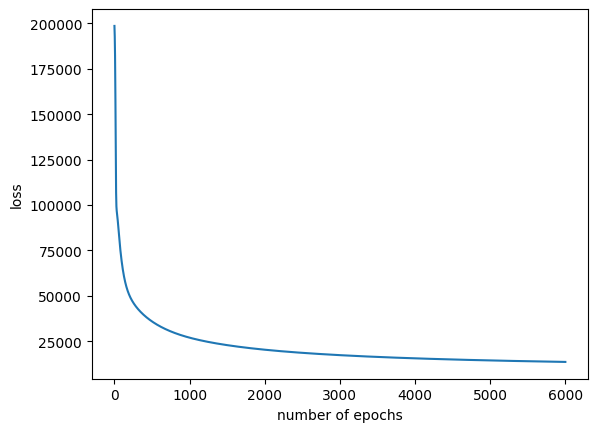

In [42]:
# BASE MODEL 
y=[int(l == "positive") for l in labels_train]
y = np.array(y)
num_features=len(vocab_list)
weights = np.random.rand(num_features)
bias=np.random.rand(1)
n_iters = 6000
lr=0.225
logistic_loss=[]
num_samples=len(y)

for i in range(n_iters):
    if i % 100 == 0: # for logging progress
        print(i)
    
    loss = 0.0
    z = M_train.dot(weights.T) + bias
    q = 1/(1+np.exp(-z))
    eps=0.00001
    loss = -sum((y*np.log2(q+eps)+(np.ones(len(y))-y)*np.log2(np.ones(len(y))-q+eps)))
    logistic_loss.append(loss)

    # BASE MODEL
    dw = ((q-y).dot(M_train) * (1/len(y)))

    # L2 REGULARISATION
    # dw = ((q-y).dot(M_train) * (1/len(y))) + (0.001*weights) 
    
    db = sum((q-y))/len(y) 
    weights = weights - lr*dw 
    bias = bias - lr*db

    

plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

In [ ]:
# MODEL WITH L2 REGULARISATION
y=[int(l == "positive") for l in labels_train]
y = np.array(y)
num_features=len(vocab_list)
weights = np.random.rand(num_features)
bias=np.random.rand(1)
n_iters = 6000
lr=0.225
logistic_loss=[]
num_samples=len(y)

for i in range(n_iters):
    if i % 100 == 0: # for logging progress
        print(i)
    
    loss = 0.0
    z = M_train.dot(weights.T) + bias
    q = 1/(1+np.exp(-z))
    eps=0.00001
    loss = -sum((y*np.log2(q+eps)+(np.ones(len(y))-y)*np.log2(np.ones(len(y))-q+eps)))
    logistic_loss.append(loss)

    # BASE MODEL
    dw = ((q-y).dot(M_train) * (1/len(y)))

    # L2 REGULARISATION
    # dw = ((q-y).dot(M_train) * (1/len(y))) + (0.001*weights) 
    
    db = sum((q-y))/len(y) 
    weights = weights - lr*dw 
    bias = bias - lr*db

    

plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

In [ ]:
# MODEL WITH BATCH TRAINING

k = 443
# Create array of all indices in training data
a=np.arange(M_train.shape[0])
# randomly shuffle indices in place (in case of classes being unequally distributed across positions in data)
np.random.shuffle(a)
# Split indices into k equal batches
batches=np.array(np.split(a, k))

y=[int(l == "positive") for l in labels_train]
y = np.array(y)
num_features=len(vocab_list)
weights = np.random.rand(num_features)
bias=np.random.rand(1)
n_iters = 6000
lr=0.225
logistic_loss=[]
num_samples=len(y)

for i in range(n_iters):
    if i % 100 == 0: # for logging progress
        print(i)
    
    loss = 0.0
    for j in range(len(batches)):
        this_batch_M_train = M_train[batches[j]]
        this_batch_y_train = y[batches[j]]
        z = this_batch_M_train.dot(weights.T) + bias
        q = 1/(1+np.exp(-z))

        # calculate loss
        eps=0.00001
        loss = -sum((this_batch_y_train*np.log2(q+eps)+(np.ones(len(this_batch_y_train))-this_batch_y_train)*np.log2(np.ones(len(this_batch_y_train))-q+eps)))
        

        # calculate gradients
        dw = ((q-this_batch_y_train).dot(this_batch_M_train) * (1/len(this_batch_y_train)))
        db = sum((q-this_batch_y_train))/len(this_batch_y_train) 

        # update weights
        weights = weights - lr*dw 
        bias = bias - lr*db
    logistic_loss.append(loss)
    

plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")
#loss = sum(-(np.ones(len(y))*np.log2(q)+(np.ones(len(y))-y)*np.log2(np.ones(len(y))-q)))

In [43]:
# EVALUATE ON TEST SET
z = M_test.dot(weights)+bias # weighted inputs
q = 1/(1+np.exp(-z)) # sigmoided input

y_test_pred = [int(prob > 0.5) for prob in q] 
y_test=[int(l == "positive") for l in labels_test]


# EVALUATION METRICS
# accuracy
acc_test=[int(yp == y_test[s]) for s,yp in enumerate(y_test_pred)]
print(f'accuracy: {sum(acc_test)/len(acc_test)}')

# precision and recall
labels_test_pred=["positive" if s == 1 else "negative" for s in y_test_pred]
true_positives=sum([int(yp == "positive" and labels_test[s] == "positive") for s,yp in enumerate(labels_test_pred)])
false_negatives=sum([int(yp == "negative" and labels_test[s] == "positive") for s,yp in enumerate(labels_test_pred)])
false_positives=sum([int(yp == "positive" and labels_test[s] == "negative") for s,yp in enumerate(labels_test_pred)])
true_negatives=sum([int(yp == "negative" and labels_test[s] == "negative") for s,yp in enumerate(labels_test_pred)])

precision = true_positives/(true_positives + false_positives)
recall = true_positives/(true_positives + false_negatives)
print(f'precision: {precision}')
print(f'recall: {recall}')


accuracy: 0.8306429548563612
precision: 0.837138863000932
recall: 0.8695546950629235


In [44]:
# EXAMINING WEIGHTS
print("most impactful words for a positive review:")
print([vocab_list[x] for x in np.argsort(weights)[::-1][:20]])
print([vocab_list[x] for x in np.argsort(weights)[::-1][20:40]])

print("\nmost impactful words for a negative review:")
print([vocab_list[x] for x in np.argsort(weights)[:20]])
print([vocab_list[x] for x in np.argsort(weights)[20:40]])

most impactful words for a positive review:
['amazing', 'Great', 'pleased', 'awesome', 'excellent', 'perfect', 'satisfied', 'delicious', 'best', 'saver', 'easy', 'loves', 'love', 'wonderful', 'grill', 'happy', 'job', 'skeptical', 'Excellent', 'missions']
['unique', 'aroma', 'great', 'glad', 'worry', 'darker', 'lenses', 'nicely', 'amazed', 'wax', 'favorites', 'Easy', 'fabulous', 'favorite', 'hooked', 'bill', 'GREAT', 'picks', 'pleasantly', 'gorgeous']

most impactful words for a negative review:
['worst', 'terrible', 'poor', 'waste', 'Unfortunately', 'disappointed', 'boring', 'return', 'returned', 'horrible', 'disappointing', 'NOT', 'poorly', 'useless', 'disappointment', 'support', 'Instead', 'happened', 'cannot', 'idea']
['nothing', 'On', 'wasted', 'plastic', 'returning', 'against', 'bad', 'joke', 'awful', 'Maybe', 'By', 'uncomfortable', 'junk', 'example', 'broke', 'Not', 'money', 'How', 'weak', 'instead']
